In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

summary = pd.read_csv('data/summary_dataset.csv')

  Ethnicity  RevenueInThousands    Sex  Average Employee Revenue
0     Total        3.840554e+10  Total             299583.588701
1     Total        2.830977e+08  Total             151150.116634
2     Total        2.808711e+08  Total             222873.234843
3     Total        4.463871e+07  Total             124292.993560
4     Total        3.732536e+09  Total             216858.323538


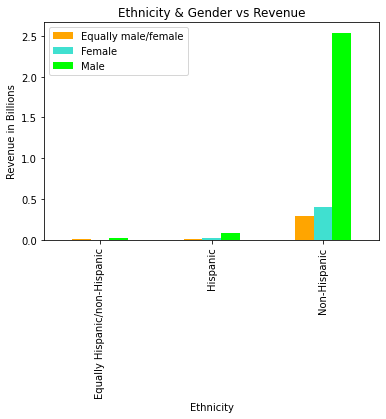

: 

In [3]:
#Extract needed columns
ethnicity_rit_sex = summary[['Ethnicity', 'RevenueInThousands', 'Sex']].copy()

ethnicity_rit_sex['Average Employee Revenue'] = (summary['RevenueInThousands'] * 1000) / summary['EmployeeCt']

print(ethnicity_rit_sex.head())
exit()
#Rename to show the correct format & multiply revenue by 1000 to get accurate count
ethnicity_rit_sex.rename(columns = {'RevenueInThousands' : 'Revenue'}, inplace = True)
ethnicity_rit_sex['RevenueInBillions'] = summary['RevenueInThousands'] * 1000

#Remove certain rows to show exact data
ethnicity_rit_sex = ethnicity_rit_sex[ethnicity_rit_sex.Ethnicity != 'Total']
ethnicity_rit_sex = ethnicity_rit_sex[ethnicity_rit_sex.Ethnicity != 'Classifiable']
ethnicity_rit_sex = ethnicity_rit_sex[ethnicity_rit_sex.Ethnicity != 'Unclassifiable']
ethnicity_rit_sex = ethnicity_rit_sex[ethnicity_rit_sex.Sex != 'Total']
ethnicity_rit_sex = ethnicity_rit_sex[ethnicity_rit_sex.Ethnicity != 'Classifiable']

#Sort the values and drop null values 
sorted_ethnicity_rit_sex = ethnicity_rit_sex.sort_values(by = 'Revenue').dropna()

#group by and divide the Revenue column by 1,000,000. Unstack the sex column

summed_ethnicity_rit_sex = sorted_ethnicity_rit_sex.groupby(['Ethnicity','Sex'])['Revenue'].mean().div(1000000000).unstack('Sex')

#graph the chart 
graph_ethnicity_rit_sex = summed_ethnicity_rit_sex.plot.bar(title = 'Ethnicity & Gender vs Revenue' , color = ['orange','turquoise','lime'])

#set the y label
graph_ethnicity_rit_sex.set_ylabel('Revenue in Billions')

#fix the legend
graph_ethnicity_rit_sex.legend(['Equally male/female', 'Female', 'Male'], title = '')